<a href="https://colab.research.google.com/github/hargurjeet/bt/blob/main/EDA_and_Visualization_NY_city_taxi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
## Perfoming the required imports
import pandas as pd
import numpy as np

## Libraires for building visuals
import matplotlib.pyplot as plt
import seaborn as sns

pd.options.mode.chained_assignment = None  # default='warn'

In [2]:
required_cols = ['fare_amount', 'pickup_datetime', 'pickup_longitude',
       'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude',
       'passenger_count']

dtypes = {
    'fare_amount' : 'float32', 
    'pickup_datetime': 'float32',
    'pickup_longitude': 'float32',
    'pickup_latitude': 'float32',
    'dropoff_longitude': 'float32',
    'dropoff_latitude': 'float32',
    'passenger_count': 'uint8'
}

file_path = 'https://raw.githubusercontent.com/hargurjeet/bt/main/ny_taxi_fare_data.csv'
df = pd.read_csv(file_path, 
                 usecols = required_cols, 
                 parse_dates=['pickup_datetime'],
                 dtype = dtypes)
df.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,4.5,2009-06-15 17:26:21+00:00,-73.844315,40.721317,-73.841614,40.712276,1
1,16.9,2010-01-05 16:52:16+00:00,-74.016045,40.711304,-73.979271,40.782005,1
2,5.7,2011-08-18 00:35:00+00:00,-73.982735,40.761269,-73.991241,40.750561,2
3,7.7,2012-04-21 04:30:42+00:00,-73.987129,40.733143,-73.991570,40.758091,1
4,5.3,2010-03-09 07:51:00+00:00,-73.968094,40.768009,-73.956657,40.783764,1


# Understanding the Dataset

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype              
---  ------             --------------  -----              
 0   fare_amount        50000 non-null  float32            
 1   pickup_datetime    50000 non-null  datetime64[ns, UTC]
 2   pickup_longitude   50000 non-null  float32            
 3   pickup_latitude    50000 non-null  float32            
 4   dropoff_longitude  50000 non-null  float32            
 5   dropoff_latitude   50000 non-null  float32            
 6   passenger_count    50000 non-null  uint8              
dtypes: datetime64[ns, UTC](1), float32(5), uint8(1)
memory usage: 1.4 MB


key insights - 
- Dataset contatins no null values
- The columns data types parsed by pandas looks fine

In [4]:
df.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,11.364215,-72.521416,39.931904,-72.517723,39.924244,1.667840
std,9.685438,10.392804,6.224685,10.406597,6.014816,1.289195
min,-5.000000,-75.423851,-74.006889,-84.654243,-74.006378,0.000000
25%,6.000000,-73.992065,40.734879,-73.991150,40.734371,1.000000
50%,8.500000,-73.981842,40.752678,-73.980080,40.753372,1.000000
75%,12.500000,-73.967148,40.767361,-73.963585,40.768166,2.000000
max,200.000000,40.783470,401.083344,40.851028,43.415192,6.000000


Key Insights - 
- New york longitude and latitude is 40.73, -73.93 (source refer reference section)
- The dataset has longitude data ranges from -75 to 40 and latitude data ranges from -74 to 43, This looks highly suspectable.
- Considering the geographical limitations of city taxi, It would be a worth while excerise to consider records for latitude ranges from 40 - 42 and  ranges longtide from -72 to -75.
-  A maximum amount of 5 passengers are allowed in NY city taxi (source refer  reference section), The dataset contains passanges information from 0 to 6, Hence outlier can be removed.
-  Fare amount can not be -ve. Hence keeping only +ve values of fare amount

In [5]:
## Dataset records before cleaning

print('Record Count Before Cleaning', df.shape)

def data_cleanup(df):

  return df[(df.pickup_longitude>= -75) & (df.pickup_longitude<=-72) & (df.pickup_latitude>= 40) & (df.pickup_latitude <=42) & 
      (df.dropoff_latitude>=40) &(df.dropoff_latitude<=42)& (df.dropoff_longitude>=-75) &(df.dropoff_longitude<=-72) &
     (df.passenger_count >=1) & ((df.passenger_count <=5)) &(df.fare_amount>1)]

df_cleaned = data_cleanup(df)

print('Record Count After Cleaning', df_cleaned.shape)

Record Count Before Cleaning (50000, 7)
Record Count After Cleaning (47809, 7)


In [6]:
# Evaluating the dataset after the cleanup acitivity is completed
df_cleaned.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,47809.000000,47809.000000,47809.000000,47809.000000,47809.000000,47809.000000
mean,11.343471,-73.986969,40.749271,-73.987190,40.749588,1.586521
std,9.654293,0.041516,0.030970,0.040838,0.033687,1.142503
min,2.500000,-74.711647,40.121655,-74.755478,40.164928,1.000000
25%,6.000000,-73.992332,40.736465,-73.991325,40.735931,1.000000
50%,8.500000,-73.982132,40.753391,-73.980492,40.754147,1.000000
75%,12.500000,-73.968422,40.767727,-73.965401,40.768520,2.000000
max,200.000000,-72.856972,41.650002,-72.854942,41.543217,5.000000


In [7]:
def min_max_date(df, date_col):
  return df[date_col].max(), df[date_col].min()

min_max_date(df_cleaned, 'pickup_datetime')

(Timestamp('2015-06-30 22:42:39+0000', tz='UTC'),
 Timestamp('2009-01-01 01:31:49+0000', tz='UTC'))

Key insights - 
- The minimum fare of yellow taxi seems to be 2.5 dollars
- 75% of rides are under 12.5 dollars and carried upto 2 passanges.
- All the rides data is from Jan 2009 to July 2015.

In [8]:
df_cleaned.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,4.5,2009-06-15 17:26:21+00:00,-73.844315,40.721317,-73.841614,40.712276,1
1,16.9,2010-01-05 16:52:16+00:00,-74.016045,40.711304,-73.979271,40.782005,1
2,5.7,2011-08-18 00:35:00+00:00,-73.982735,40.761269,-73.991241,40.750561,2
3,7.7,2012-04-21 04:30:42+00:00,-73.987129,40.733143,-73.991570,40.758091,1
4,5.3,2010-03-09 07:51:00+00:00,-73.968094,40.768009,-73.956657,40.783764,1


## Analysing indivual features

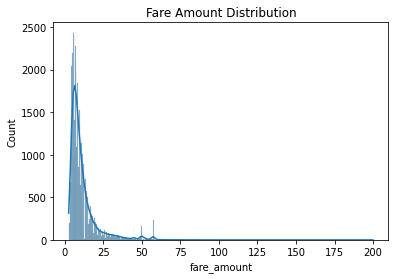

In [9]:
sns.histplot(data = df_cleaned, kde=True, x='fare_amount');
plt.title('Fare Amount Distribution');

This looks to be Right skewed histogram or positively skewed graph

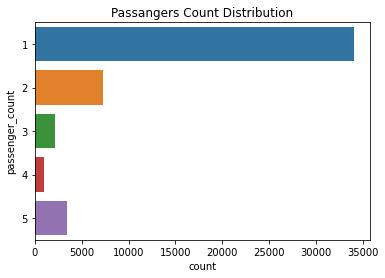

In [10]:
sns.countplot(data = df_cleaned, y='passenger_count');
plt.title('Passangers Count Distribution');

In [11]:
Passanger_Percentage = pd.DataFrame(df_cleaned.passenger_count.value_counts()/df_cleaned.shape[0])
Passanger_Percentage = Passanger_Percentage.rename(columns = {'passenger_count': 'passenger_perenctage'})

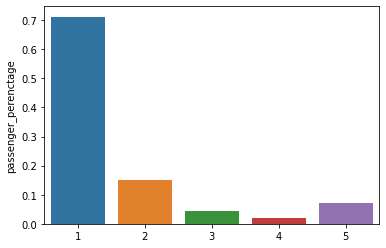

In [12]:
sns.barplot(data=Passanger_Percentage, x=Passanger_Percentage.index, y=Passanger_Percentage.passenger_perenctage);

To work with other features we are required to pre process the remaining columns so that any analysis can be performed. Hence I think of the following approaches

- Split the datetime column to understand the trip data across Year and month.
- Calculating the distance between the pick and drop locations.
- Understanding the distance between drop location against the key destinaitons.
- Key Destination
  - Airports
    - JFK airport
    - LGA Airport
    - EWR airport
    - WTC

In [40]:
from datetime import datetime
import calendar
print(calendar.day_name[datetime.today().weekday()])

Monday


In [13]:
## Splitting the datatime to Year and Month
def part_of_dates(df, column):
  df[column+ '_year']= df[column].dt.year
  df[column+ '_month']= df[column].dt.month
  df[column+ '_day']= df[column].dt.day
  df[column+ '_week']= df[column].dt.weekday
  df[column+ '_hour']= df[column].dt.hour
  df[column+ '_weekday']= df[column].dt.weekday

part_of_dates(df_cleaned,'pickup_datetime')

## using Haversin formula to calculate the distance between pickup and drop location
def haversine_np(lon1, lat1, lon2, lat2):
    """
    Calculate the great circle distance between two points
    on the earth (specified in decimal degrees)

    All args must be of equal length.    

    """
    lon1, lat1, lon2, lat2 = map(np.radians, [lon1, lat1, lon2, lat2])

    dlon = lon2 - lon1
    dlat = lat2 - lat1

    a = np.sin(dlat/2.0)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2.0)**2

    c = 2 * np.arcsin(np.sqrt(a))
    km = 6367 * c
    return km

def trip_distance(df):
  df['trip_distance'] = haversine_np(df['pickup_longitude'],
                                      df['pickup_latitude'],
                                      df['dropoff_longitude'],
                                      df['dropoff_latitude'])
  
trip_distance(df_cleaned)

In [14]:
jfk_lonlat = -73.7781, 40.6413
lga_lonlat = -73.8740, 40.7769
ewr_lonlat = -74.1745, 40.6895
wtc_lonlat = -74.0099, 40.7126

In [15]:
def add_landmark_dropoff_distance(df, landmark_name, landmark_lonlat):
    lon, lat = landmark_lonlat
    df[landmark_name + '_drop_distance'] = haversine_np(lon, lat, df['dropoff_longitude'], df['dropoff_latitude'])

In [16]:
landmarks = [('jfk', jfk_lonlat), ('lga', lga_lonlat), ('ewr', ewr_lonlat), ('wtc', wtc_lonlat)]
for name, lonlat in landmarks: 
  add_landmark_dropoff_distance(df_cleaned, name, lonlat)

In [17]:
df_cleaned.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_datetime_year,pickup_datetime_month,pickup_datetime_day,pickup_datetime_week,pickup_datetime_hour,trip_distance,jfk_drop_distance,lga_drop_distance,ewr_drop_distance,wtc_drop_distance
0,4.5,2009-06-15 17:26:21+00:00,-73.844315,40.721317,-73.841614,40.712276,1,2009,6,15,0,17,1.030422,9.532060,7.681617,28.158794,14.175371
1,16.9,2010-01-05 16:52:16+00:00,-74.016045,40.711304,-73.979271,40.782005,1,2010,1,5,1,16,8.444458,23.056835,8.876063,19.388584,8.132391
2,5.7,2011-08-18 00:35:00+00:00,-73.982735,40.761269,-73.991241,40.750561,2,2011,8,18,3,0,1.388772,21.677397,10.292645,16.860367,4.501694
3,7.7,2012-04-21 04:30:42+00:00,-73.987129,40.733143,-73.991570,40.758091,1,2012,4,21,5,4,2.797727,22.178518,10.113103,17.188660,5.285775
4,5.3,2010-03-09 07:51:00+00:00,-73.968094,40.768009,-73.956657,40.783764,1,2010,3,9,1,7,1.997631,21.836897,6.997129,21.122910,9.089992


Insights - 
- The total trips doen't see much variations. My the market is saturated and there doesnt seems to be growth.

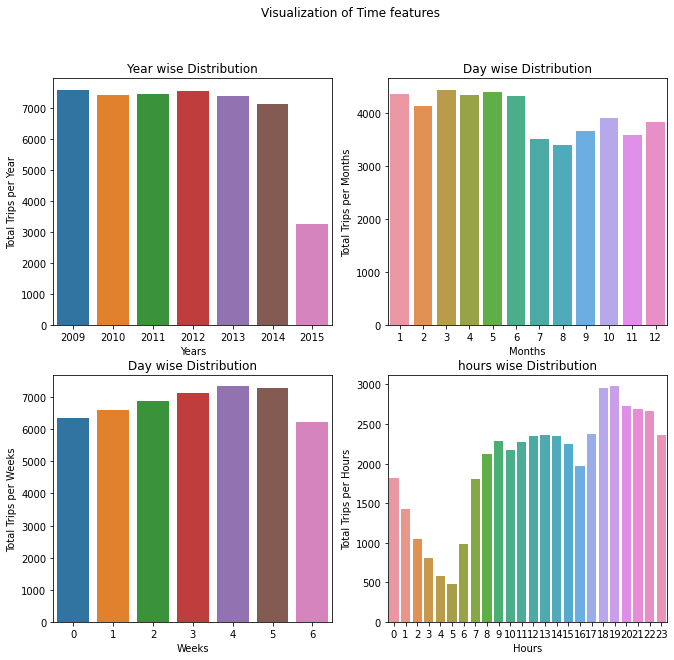

In [18]:
fig, axes = plt.subplots(2, 2, figsize=(11,10))
fig.suptitle('Visualization of Time features')

## Yearly Analysis
sns.barplot(ax=axes[0,0], x= df_cleaned.pickup_datetime_year.value_counts().index, y = df_cleaned.pickup_datetime_year.value_counts())
axes[0,0].set_title('Year wise Distribution')
axes[0,0].set_xlabel('Years');
axes[0,0].set_ylabel('Total Trips per Year');

## Monthly Analysis
sns.barplot(ax=axes[0,1], x= df_cleaned.pickup_datetime_month.value_counts().index, y = df_cleaned.pickup_datetime_month.value_counts());
axes[0,1].set_title('Month wise Distribution')
axes[0,1].set_xlabel('Months');
axes[0,1].set_ylabel('Total Trips per Months');

## Weekly Analysis
sns.barplot(ax=axes[1,0], x= df_cleaned.pickup_datetime_week.value_counts().index, y = df_cleaned.pickup_datetime_week.value_counts());
axes[1,0].set_title('Day wise Distribution')
axes[1,0].set_xlabel('Weeks');
axes[1,0].set_ylabel('Total Trips per Weeks');

## Hourly Analysis
sns.barplot(ax=axes[1,1], x= df_cleaned.pickup_datetime_hour.value_counts().index, y = df_cleaned.pickup_datetime_hour.value_counts());
axes[1,1].set_title('hours wise Distribution')
axes[1,1].set_xlabel('Hours');
axes[1,1].set_ylabel('Total Trips per Hours');

Key Insights

- The trips distribution across years seems to be constant. This also shows the the overall buniess is not growing over last 7 years.
- Month from March - June semms to busiest and people opting for cab in those months.
- Trips are gradually increasing over upto week 4.
-The busiest hour of the day looks to be evening and late nights.

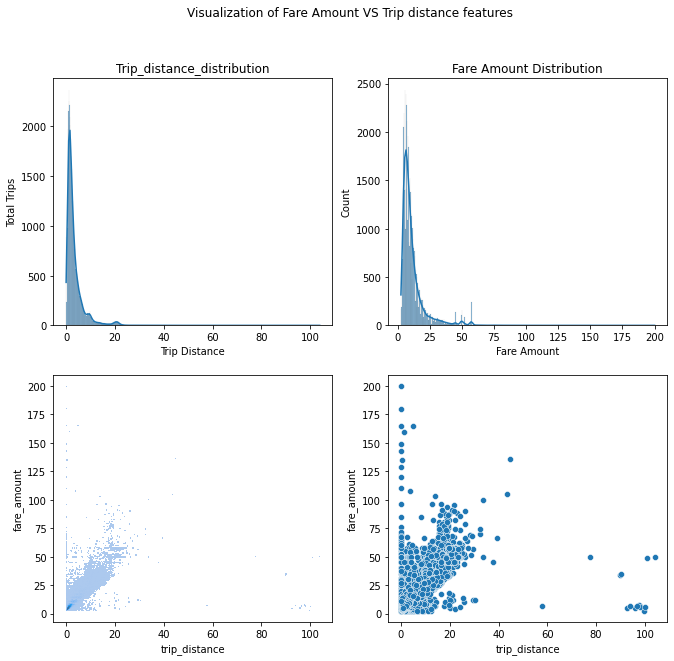

In [19]:
fig, axes = plt.subplots(2, 2, figsize=(11,10))
fig.suptitle('Visualization of Fare Amount VS Trip distance features')

sns.histplot(ax=axes[0,0], data = df_cleaned, kde=True, x='trip_distance');
axes[0,0].set_title('Trip_distance_distribution');
axes[0,0].set_xlabel('Trip Distance')
axes[0,0].set_ylabel('Total Trips')


sns.histplot(ax=axes[0,1], data = df_cleaned, kde=True, x='fare_amount');
axes[0,1].set_title('Fare Amount Distribution');
axes[0,1].set_xlabel('Fare Amount')
axes[0,1].set_ylabel('Count')

sns.histplot(ax=axes[1,0], data = df_cleaned, x='trip_distance', y='fare_amount', )

sns.scatterplot(ax=axes[1,1], data = df_cleaned, y='fare_amount', x='trip_distance', )

Key Insights
- Most of the trip distances are short, this shows yellow taxi's are preferred for shot distances maybe less than 10 kms.
- Fare amount proportional to trip distances.
- Some outlier are also observed, There are trip with high trip distance but low fare amount and vice versa.

# Analysing Feature Relationships

Q: Trip utilised for Airport drops ?

In [20]:
airport_drops = df_cleaned[(df_cleaned['ewr_drop_distance']<=1) | 
                        (df_cleaned['jfk_drop_distance']<=1) | 
                        (df_cleaned['lga_drop_distance']<=1) |
                        (df_cleaned['wtc_drop_distance']<=1)]

airport_drops.shape, df_cleaned.shape

((2622, 17), (47809, 17))

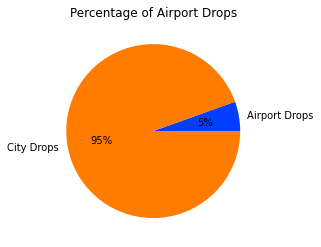

In [21]:
#define data
airport_drop_percent = (airport_drops.shape[0]/df_cleaned.shape[0])*100
Other_trip_percent = 100 - airport_drop_percent
data = [airport_drop_percent, Other_trip_percent]
labels = ['Airport Drops', 'City Drops']


#define Seaborn color palette to use
colors = sns.color_palette('bright')[0:5]

#create pie chart
plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
plt.title('Percentage of Airport Drops')
plt.show()

Q: People opting for longer trip during which hour of the day.

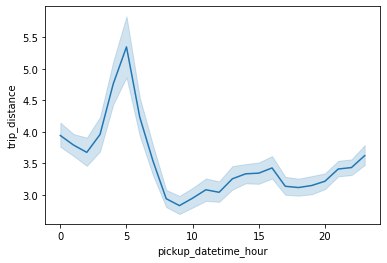

In [22]:
sns.lineplot(y='trip_distance', x='pickup_datetime_hour', data = df_cleaned)

- During early hours the distance travel is high.
- As the day progress, they prefer to choose short trips.

In [23]:
df_cleaned.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_datetime_year,pickup_datetime_month,pickup_datetime_day,pickup_datetime_week,pickup_datetime_hour,trip_distance,jfk_drop_distance,lga_drop_distance,ewr_drop_distance,wtc_drop_distance
0,4.5,2009-06-15 17:26:21+00:00,-73.844315,40.721317,-73.841614,40.712276,1,2009,6,15,0,17,1.030422,9.532060,7.681617,28.158794,14.175371
1,16.9,2010-01-05 16:52:16+00:00,-74.016045,40.711304,-73.979271,40.782005,1,2010,1,5,1,16,8.444458,23.056835,8.876063,19.388584,8.132391
2,5.7,2011-08-18 00:35:00+00:00,-73.982735,40.761269,-73.991241,40.750561,2,2011,8,18,3,0,1.388772,21.677397,10.292645,16.860367,4.501694
3,7.7,2012-04-21 04:30:42+00:00,-73.987129,40.733143,-73.991570,40.758091,1,2012,4,21,5,4,2.797727,22.178518,10.113103,17.188660,5.285775
4,5.3,2010-03-09 07:51:00+00:00,-73.968094,40.768009,-73.956657,40.783764,1,2010,3,9,1,7,1.997631,21.836897,6.997129,21.122910,9.089992


In [24]:
df_cleaned.trip_distance.describe()

count    47809.000000
mean         3.351357
std          3.926130
min          0.000000
25%          1.261208
50%          2.155177
75%          3.926740
max        103.969444
Name: trip_distance, dtype: float64

## Q: Does the number of passengers affect the fare?


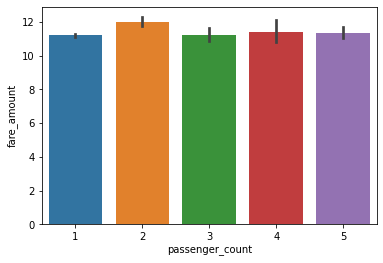

In [25]:
sns.barplot(x='passenger_count', y='fare_amount', data=df_cleaned)

## Q: Does the date and time of pickup affect the fare?

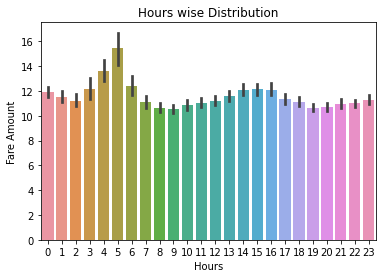

In [26]:
sns.barplot(x= df_cleaned.pickup_datetime_hour, y = df_cleaned.fare_amount);
plt.title('Hours wise Distribution')
plt.xlabel('Hours');
plt.ylabel('Fare Amount');

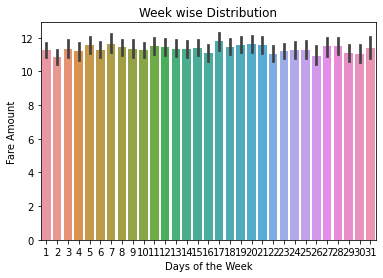

In [29]:
sns.barplot(x= df_cleaned.pickup_datetime_day, y = df_cleaned.fare_amount);
plt.title('Week wise Distribution')
plt.xlabel('Days of the Week');
plt.ylabel('Fare Amount');

- Does the day of the week affect the fare?

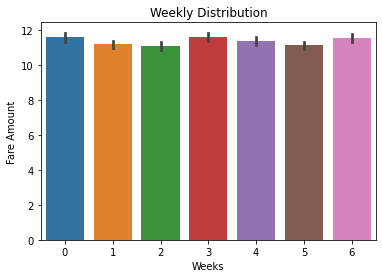

In [30]:
sns.barplot(x= df_cleaned.pickup_datetime_week, y = df_cleaned.fare_amount);
plt.title('Weekly Distribution')
plt.xlabel('Weeks');
plt.ylabel('Fare Amount');

- Does the distance travelled affect the fare?

In [42]:
calander_days = {0:'Monday', 1:'Tuesday', 2:'Wedensay', 3:'Thrusday', 4:'Friday', 5:'Saturday', 6:'Sunday'}
df_cleaned['Weekday']= df_cleaned['pickup_datetime_week'].map(calander_days)

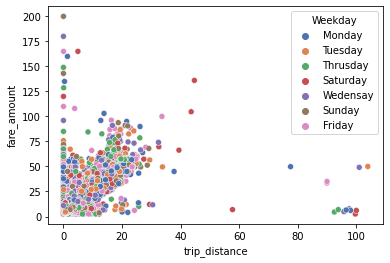

In [44]:
sns.scatterplot(data = df_cleaned, y='fare_amount', x='trip_distance', hue = 'Weekday', palette="deep");

# References
- NY long and lat info - https://www.latlong.net/place/new-york-city-ny-usa-1848.html
- Amount of passangers allowed -  https://www1.nyc.gov/site/tlc/passengers/passenger-frequently-asked-questions.page
- Key attraction in New York city - https://www.planetware.com/tourist-attractions-/new-york-city-us-ny-nyc.htm